# Data Preprocessing Tools

## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

## Importing the dataset

In [2]:
train = pd.read_csv("dataset/train-1.csv")
test = pd.read_csv("dataset/test.csv")
train['Data'] = 'Train'
test['Data'] = 'Test'
both = pd.concat([train, test], axis=0).reset_index(drop=True)
both['subject'] = '#' + both['subject'].astype(str)

In [13]:
print(both)

       tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
0               0.288585          -0.020294          -0.132905   
1               0.278419          -0.016411          -0.123520   
2               0.279653          -0.019467          -0.113462   
3               0.279174          -0.026201          -0.123283   
4               0.276629          -0.016570          -0.115362   
...                  ...                ...                ...   
10294           0.310155          -0.053391          -0.099109   
10295           0.363385          -0.039214          -0.105915   
10296           0.349966           0.030077          -0.115788   
10297           0.237594           0.018467          -0.096499   
10298           0.153627          -0.018437          -0.137018   

       tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
0             -0.995279         -0.983111         -0.913526         -0.995112   
1             -0.998245         -0.975300    

In [ ]:
print(test)

## Taking care of missing data

In [3]:
def basic_details(df):
    b = pd.DataFrame()
    b['Missing value'] = df.isnull().sum()
    b['N unique value'] = df.nunique()
    b['dtype'] = df.dtypes
    return b
basic_details(both)

,Missing value,N unique value,dtype
tBodyAcc-mean()-X,0,10292,float64
tBodyAcc-mean()-Y,0,10299,float64
tBodyAcc-mean()-Z,0,10293,float64
tBodyAcc-std()-X,0,10295,float64
tBodyAcc-std()-Y,0,10297,float64
...,...,...,...
"angle(Y,gravityMean)",0,10299,float64
"angle(Z,gravityMean)",0,10299,float64
subject,0,30,object
Activity,0,6,object


<BarContainer object of 6 artists>

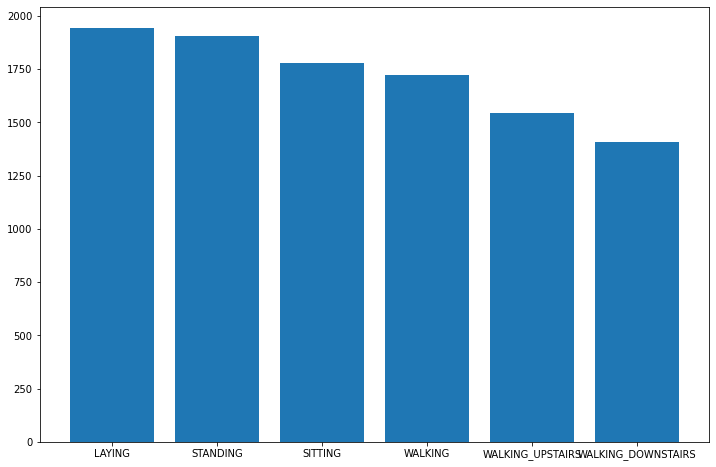

In [4]:
activity = both['Activity']
label_counts = activity.value_counts()

plt.figure(figsize= (12, 8))
plt.bar(label_counts.index, label_counts)

In [18]:
Data = both['Data']
Subject = both['subject']
train = both.copy()
train = train.drop(['Data','subject','Activity'], axis =1)

In [15]:
print(train)

       tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
0               0.288585          -0.020294          -0.132905   
1               0.278419          -0.016411          -0.123520   
2               0.279653          -0.019467          -0.113462   
3               0.279174          -0.026201          -0.123283   
4               0.276629          -0.016570          -0.115362   
...                  ...                ...                ...   
10294           0.310155          -0.053391          -0.099109   
10295           0.363385          -0.039214          -0.105915   
10296           0.349966           0.030077          -0.115788   
10297           0.237594           0.018467          -0.096499   
10298           0.153627          -0.018437          -0.137018   

       tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
0             -0.995279         -0.983111         -0.913526         -0.995112   
1             -0.998245         -0.975300    

## Scaleing

In [19]:
# Standard Scaler
from sklearn.preprocessing import StandardScaler
slc = StandardScaler()
train = slc.fit_transform(train)

# dimensionality reduction
from sklearn.decomposition import PCA
pca = PCA(n_components=20, random_state=0)
train = pca.fit_transform(train)

print(train)
print(len(train[0]))

[[-16.38097982   1.99508306   3.41569012 ...  -3.41459306   3.1967869
   -0.13181184]
 [-15.58217328   1.18259369  -0.32120677 ...   0.386067     1.4371357
    0.33877641]
 [-15.42398918   2.24316643  -1.23778289 ...   0.93821058   0.28539422
    0.3733551 ]
 ...
 [ 11.84685312  -3.43356502   2.18801844 ...  -0.06933441  -5.47368598
    1.70788784]
 [  8.20668637  -4.38648876   1.31872016 ...   0.84653372  -3.56389836
    1.18468468]
 [  9.31117251  -3.98616133   1.93301777 ...   0.54046841  -1.21256127
    0.80621837]]
20


## Splitting the dataset into the Training set and Test set

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train, activity, test_size = 0.2, random_state = 0)

# Activity Recognition Algorithm

                    precision    recall  f1-score   support

            LAYING       0.98      0.96      0.97       377
           SITTING       0.81      0.77      0.79       364
          STANDING       0.81      0.87      0.84       390
           WALKING       0.93      0.98      0.95       335
WALKING_DOWNSTAIRS       0.98      0.91      0.94       278
  WALKING_UPSTAIRS       0.96      0.97      0.96       316

          accuracy                           0.91      2060
         macro avg       0.91      0.91      0.91      2060
      weighted avg       0.91      0.91      0.91      2060



<AxesSubplot:>

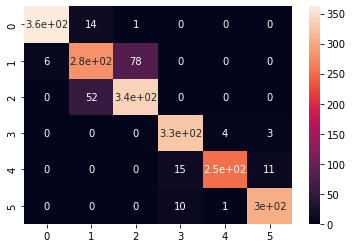

In [22]:
# Test options and evaluation metric
num_folds = 10
seed = 0
scoring = 'accuracy'
results = {}
accuracy = {}

# Finalizing the model and comparing the test, predict results
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import KFold, cross_val_score


from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(algorithm= 'auto', n_neighbors= 8, p= 1, weights= 'distance')

_ = cross_val_score(model, X_train, y_train, cv=10, scoring=scoring)
results["GScv"] = (_.mean(), _.std())

model.fit(X_train, y_train) 
y_predict = model.predict(X_test)

accuracy["GScv"] = accuracy_score(y_test, y_predict)

print(classification_report(y_test, y_predict))

cm= confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True)